<center>Universidade Federal de Viçosa</center>
<center>Pós Graduação em Inteligência Artificial e Computacional</center>
<center>ELT578 - Análise de Imagens e Visão Computacional</center>
<center>TURMA 2022/2</center>

**<center>AULA PRÁTICA 2: Técnicas de Realce</center>**
<center>Aluno: Michel Batistin Fiorio</center>

O realce é uma das técnicas de processamento de imagens e visa a obtenção de uma imagem processada mais adequada para uma aplicação específica. 
O método de realce a ser utilizado é altamente dependente do problema e, protanto, não existe regra geral. 
Nessa atividade realizaremos a aplicação das seguintes técnicas de realce:
- Negativo da imagem;
- Transformação logarítmica;
- Transformação exponencial;
- Limiarização (Threshold);
- Equalização de histograma.


In [79]:
#Permissão para acessar o drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
#Importando bibliotecas necessárias

import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

#### Negativo da imagem
Técnica: inverte os tons de cinza da imagem.

Aplicação: não possui muito uso prático.

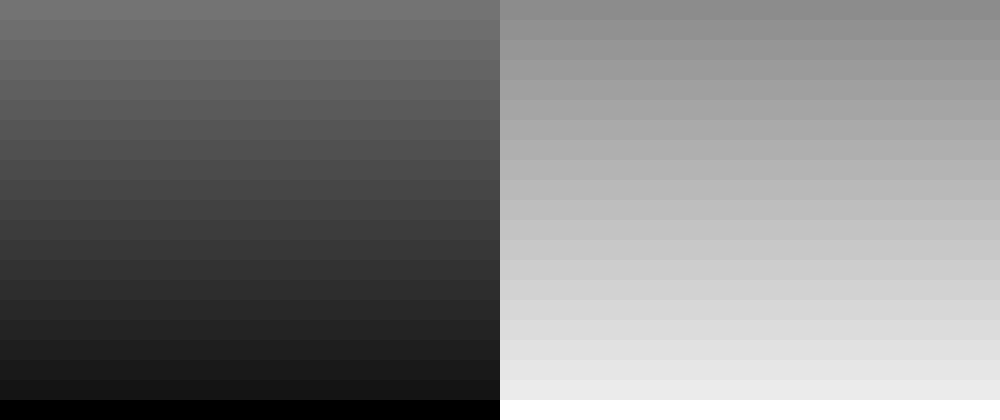

In [81]:
# Negativo da imagem

# Criando imagem de tamanho 20 x 500 de zeros
im = np.zeros([20,500], dtype = int)
im1 = np.zeros([20,500], dtype = int)

# A partir da imagem im, cria imagem maior im1 com variações de tom de cor crescentes
for i in range(0,100,5):
  imt = np.add(im, i+20)
  im1 = np.insert(im1, 0, imt, axis = 0)

# Realizando a operação de negativo de im1
neg = cv2.subtract(255,im1)
# Mostrando imagem original x negativada
cv2_imshow(np.hstack((im1,neg)))


#### Transformação logarítmica
Técnica: Aumenta a faixa dinâmica em regiões escuras e reduz a faixa dinâmica em regiões claras.

Aplicação: realçar parte escura de uma imagem. Não recomendada para imagens com grande predominância de regiões claras.

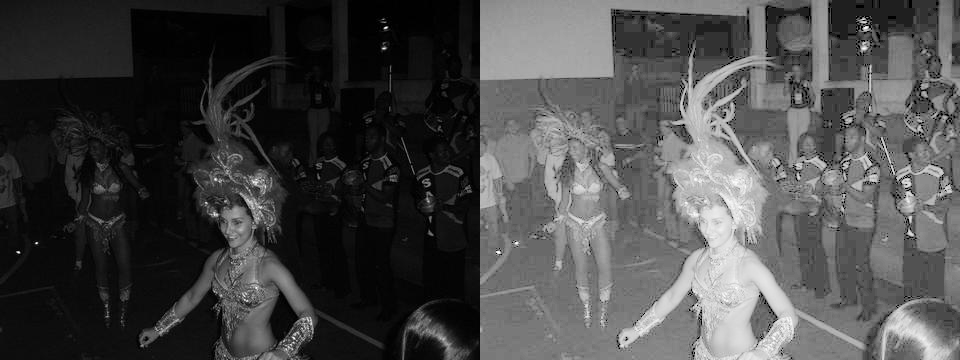

In [91]:
# Transformação logarítmica

# Carregando imagem original
Il = cv2.imread('/content/drive/MyDrive/236f.jpg',0)

# Obtendo dados da imagem
#print(f'Valor máximo de um pixel: {Il.max()}')
#print (Il.min())
c=255/np.log(1+Il.max())
#print(c.dtype)
#print(c)

# Cálculo da transformação logaritmica
Is = c*np.log(cv2.add(Il,1))
#print (Is.dtype)
#print (Is.max())
#print (Is.min())
# Normalização dos dados na faixa 0-255
Is=(Is-Is.min())/(Is.max()-Is.min())*255
#print (Is.dtype)
#print (Is.max())
#print (Is.min())
# Coversão de float para inteiro
Is = np.uint8(Is)
#print (Is.dtype)
#print (Is.max())
#print (Is.min())

# Mostrando imagem original x transformada
cv2_imshow(np.hstack((Il,Is)))

#### Transformação exponencial
Técnica: aumenta a faixa dinâmica em regiões claras e reduz a faixa dinâmica em regiões escuras. 

Aplicação: realçar parte clara de uma imagem. Recomendada para imagens com super exposição.

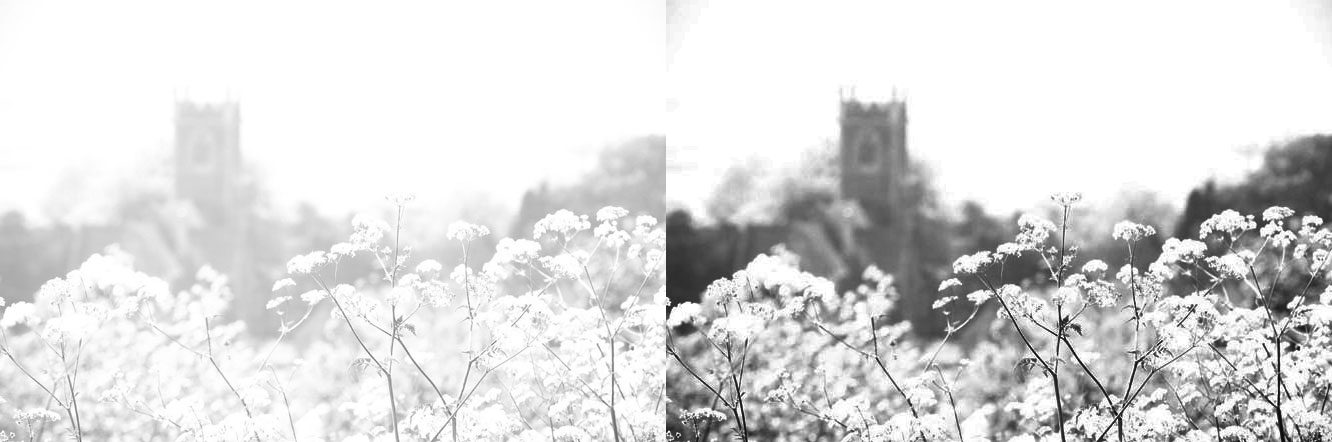

In [90]:
# Transformação exponencial

# Carregando imagem original
Io = cv2.imread('/content/drive/MyDrive/over-exposed.jpg',0)

# Obtendo dados da imagem
#print(Io.max())
#print(Io.min())

# Taxa de transformação
b = 1.02
# Calculando transformação
Ip = np.power(b, Io)-1
#print(Ip.max())
#print(Ip.min())
# Normalizando o resultado
Ip = Ip*255/Ip.max()
#print(Ip.max())
#print(Ip.min())
#print(Ip.dtype)
# Convertendo para inteiro 8 bits
Ip = np.uint8(Ip)
#print(Ip.max())
#print(Ip.min())
#print(Ip.dtype)
# Mostrando imagem original x transformada
cv2_imshow(np.hstack((Io,Ip)))

#### Limiarização
Técnica: obter uma imagem binária (apenas duas cores) a partir de uma valor limite de cor determinado.


46.214285714285715


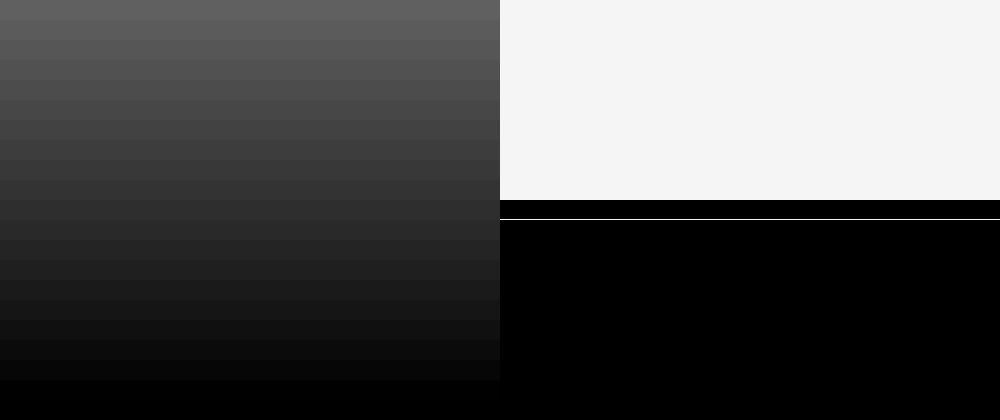

In [84]:
# Limiarização (threshold)

# Carregando imagem original
IL = cv2.imread('/content/drive/MyDrive/PC.jpg')

# Obtendo valor médio dos pixels da imagem
k = np.mean(IL)
print(k)

# Realizando a limiarização considerando valor médio obtido k
IL_thr = IL.copy()
IL_thr[IL > k] = 245
IL_thr[IL <= k] = 0
# Mostrando imagem original x limiarizada
cv2_imshow(np.hstack((IL,IL_thr)))

#### Equalização
Técnica: redistribui os valores de tons de cinza dos pixels de modo a obter um histograma uniforme.

Aplicação: para quando uma imagem possui valores mal distribuídos. Melhora o contraste da imagem. 

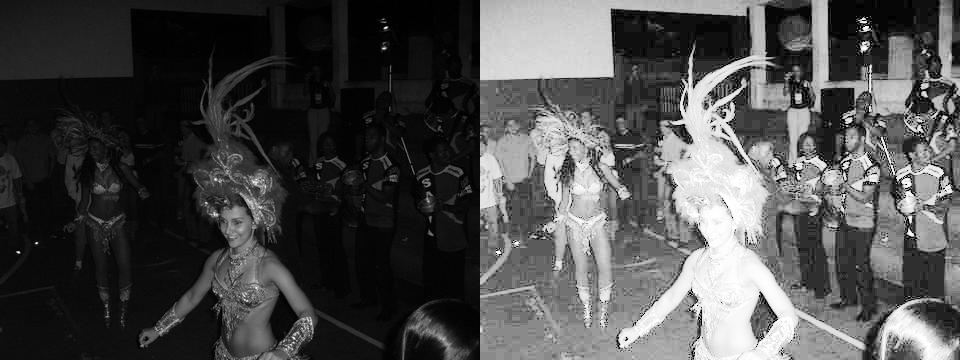

In [85]:
# Equalização de imagem em tons de cinza

# Utilizaremos a mesma imagem da atividade de transformação logaritma

# Realizando equalização da imagem
Il_eq = cv2.equalizeHist(Il)
# Colocando imagem original ao lado da imagem equalizada
result = np.hstack((Il, Il_eq))
# Mostrando imagens lado a lado
cv2_imshow(result)

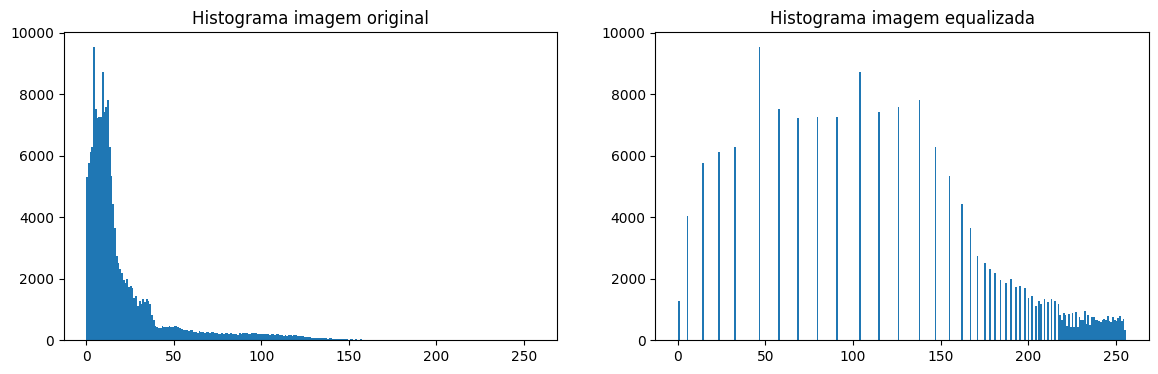

In [106]:
# Criando o histograma da imagem original x imagem equalizada

# Imagem original
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.hist(Il.ravel(), 255, [0,256])
plt.title('Histograma imagem original')

# Imagem equalizada
plt.subplot(1,2,2)
plt.hist(Il_eq.ravel(), 255, [0,256])
plt.title('Histograma imagem equalizada')
plt.show()

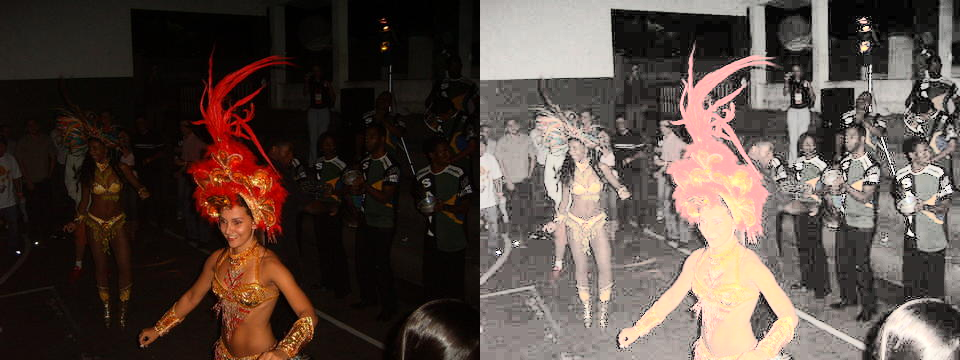

In [87]:
# Equalização de imagens coloridas

# Carregando a imagem colorida
img = cv2.imread('/content/drive/MyDrive/236f.jpg')

# Para equalizar uma imagem colorida devemos inicialmente convertê-la para um formato onde os canais com informações de cores ficam separados do canal com informação de intensidade.
# No formato BGR todos os canais possuem informações de cores. Realizar a equalização nesses canais resultaria em alteração das informações de cores.
# No formato de cores YCrCb, o canal Y da imagem reserva apenas informações de intensidade, enquanto os outros canais contêm as informações de cores.

# Convertendo a img de BGR para YCrCb
img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
# Equalização do histograma do canal Y da imagem
img_ycrcb[:,:,0] = cv2.equalizeHist(img_ycrcb[:,:,0])
# Convertendo de volta para BGR
img_eq = cv2.cvtColor(img_ycrcb, cv2.COLOR_YCrCb2BGR)

# Mostrando lado a lado imagem original e equalizada
cv2_imshow(np.hstack((img,img_eq)))



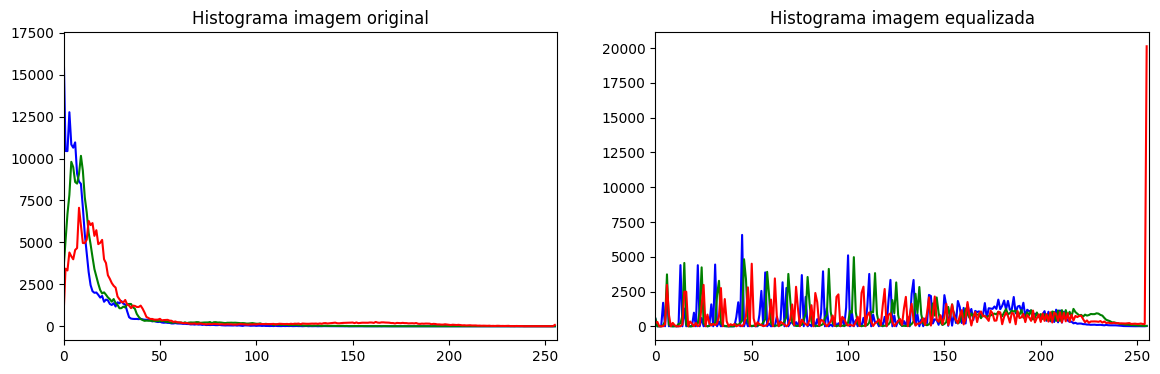

In [107]:
# Desenhando os histogramas da imagem original e equalizada

# Canais de cor
cor = ['b', 'g', 'r']

# Histograma dos três canais de cor da imagem original
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
for i,col in enumerate(cor):
  hist1 = cv2.calcHist([img], [i], None, [256], [0,256])
  plt.plot(hist1, col)
  plt.xlim(0, 256)
plt.title('Histograma imagem original')

# Histograma dos três canais de cor da imagem equalizada
plt.subplot(1,2,2)
for i,col in enumerate(cor):
  hist2 = cv2.calcHist([img_eq], [i], None, [256], [0,256])
  plt.plot(hist2, col)
  plt.xlim(0, 256)
plt.title('Histograma imagem equalizada')
plt.show()

#### Equalização utilizando função CLAHE (Constranst Limited Adaptative Histogram Equalization)
-Técnica: a maioria das técnicas de aumento de contraste depende de modificações no histograma da imagem, que podem ser aplicadas globalmente ou localmente. O método CLAHE, diferentemente do visto até aqui, trabalha em uma abordagem de aumento de contraste em uma abordagem local. O CLAHE trabalha em pequenas áreas de uma imagem, chamadas blocos, ao invés da imagem completa. Isso evita a super-amplificação do contraste da imagem em regiões mais claras.  

Imagem equalizada por 'equalizeHist', imagem original e imagem equalizada por CLAHE:


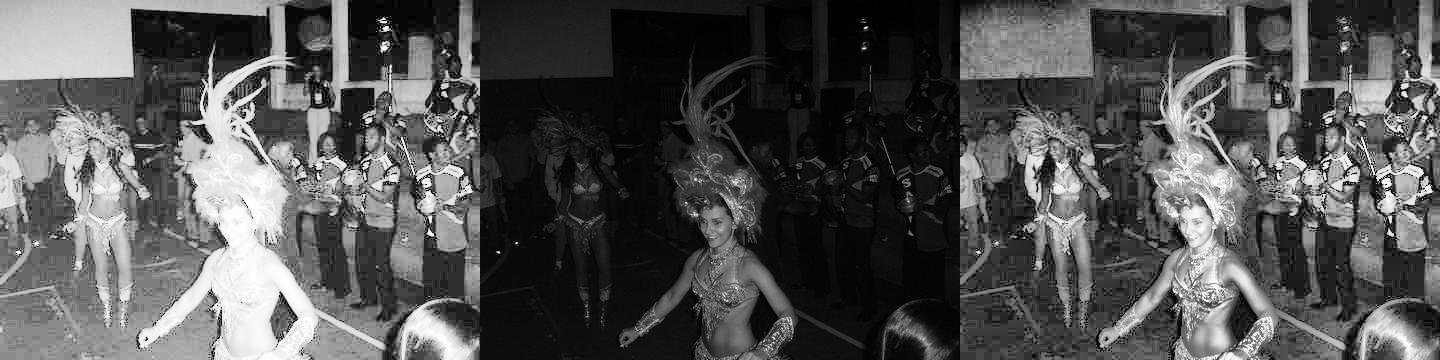

In [89]:
from ssl import create_default_context
# Carregando a imagem em tom de cinza

img_clahe = cv2.imread('/content/drive/MyDrive/236f.jpg', 0)

# Aplicando equalização CLAHE
clahe = cv2.createCLAHE(clipLimit = 14.0, tileGridSize = (8,8))
img_clahe_eq = clahe.apply(img_clahe)

# Mostrando resultado da equalização padrão x imagem original x equalização CLAHE
print("Imagem equalizada por 'equalizeHist', imagem original e imagem equalizada por CLAHE:")
cv2_imshow(np.hstack((Il_eq,img_clahe,img_clahe_eq)))

- Comentários dos resultados: ao comparar a imagem equalizada por completo (da esquerda) com a imagem equalizada por blocos (da direita) vemos que o contraste ficou mais homogêneo na foto equalizada pelo CLAHE. A dançarina do meio da foto não ficou mais com um super constraste como ocorreu na equalização da foto da direita. 